In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv('fraudTrain.csv')

In [4]:
df.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1296675.0,6.483370e+05,3.743180e+05,0.000000e+00,3.241685e+05,6.483370e+05,9.725055e+05,1.296674e+06
cc_num,1296675.0,4.171920e+17,1.308806e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.642255e+15,4.992346e+18
amt,1296675.0,7.035104e+01,1.603160e+02,1.000000e+00,9.650000e+00,4.752000e+01,8.314000e+01,2.894890e+04
zip,1296675.0,4.880067e+04,2.689322e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.204200e+04,9.978300e+04
lat,1296675.0,3.853762e+01,5.075808e+00,2.002710e+01,3.462050e+01,3.935430e+01,4.194040e+01,6.669330e+01
long,1296675.0,-9.022634e+01,1.375908e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,1296675.0,8.882444e+04,3.019564e+05,2.300000e+01,7.430000e+02,2.456000e+03,2.032800e+04,2.906700e+06
unix_time,1296675.0,1.349244e+09,1.284128e+07,1.325376e+09,1.338751e+09,1.349250e+09,1.359385e+09,1.371817e+09
merch_lat,1296675.0,3.853734e+01,5.109788e+00,1.902779e+01,3.473357e+01,3.936568e+01,4.195716e+01,6.751027e+01
merch_long,1296675.0,-9.022646e+01,1.377109e+01,-1.666712e+02,-9.689728e+01,-8.743839e+01,-8.023680e+01,-6.695090e+01


In [7]:
df.corr(numeric_only = True)

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
Unnamed: 0,1.000000,0.000386,-0.000251,0.000709,0.000602,-0.000676,-0.001678,0.998971,0.000541,-0.000671,-0.004767
cc_num,0.000386,1.000000,0.001769,0.041459,-0.059271,-0.048278,-0.008991,0.000354,-0.058942,-0.048252,-0.000981
amt,-0.000251,0.001769,1.000000,0.001843,-0.001926,-0.000187,0.005818,-0.000293,-0.001873,-0.000151,0.219404
zip,0.000709,0.041459,0.001843,1.000000,-0.114290,-0.909732,0.078467,0.000670,-0.113561,-0.908924,-0.002162
lat,0.000602,-0.059271,-0.001926,-0.114290,1.000000,-0.015533,-0.155730,0.000632,0.993592,-0.015509,0.001894
long,-0.000676,-0.048278,-0.000187,-0.909732,-0.015533,1.000000,-0.052715,-0.000642,-0.015452,0.999120,0.001721
city_pop,-0.001678,-0.008991,0.005818,0.078467,-0.155730,-0.052715,1.000000,-0.001714,-0.154781,-0.052687,0.002136
unix_time,0.998971,0.000354,-0.000293,0.000670,0.000632,-0.000642,-0.001714,1.000000,0.000561,-0.000635,-0.005078
merch_lat,0.000541,-0.058942,-0.001873,-0.113561,0.993592,-0.015452,-0.154781,0.000561,1.000000,-0.015431,0.001741
merch_long,-0.000671,-0.048252,-0.000151,-0.908924,-0.015509,0.999120,-0.052687,-0.000635,-0.015431,1.000000,0.001721


# Pre-processing

In [8]:
# CONVERTING trans_date_trans_time to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
print(type(df['trans_date_trans_time'][0]))


# Converting dob column to datetime 
df['dob'] = pd.to_datetime(df['dob'])
print(type(df['dob'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [9]:
# Counting number of fraud and actual transactions
print(pd.value_counts(df['is_fraud'] == 1))

is_fraud
False    1289169
True        7506
Name: count, dtype: int64


C:\Users\DHYEY DESAI\AppData\Local\Temp\ipykernel_5672\2826597553.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(df['is_fraud'] == 1))


In [10]:
# Dropping the df['first'] & df['last'] column as Name plays no role in frauds
del([df['first'],df['last']])
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [11]:
del([df['trans_num'], df['Unnamed: 0'], df['cc_num'], df['unix_time'], df['street']])
df.shape

(1296675, 16)

In [12]:
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day'] = df['trans_date_trans_time'].dt.dayofweek
df['is_weekend'] = df['day'].isin([5,6]).astype(int)

df.head(3)

,trans_date_trans_time,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,hour,day,is_weekend
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,0,1,0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,0,1,0
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,0,1,0


In [13]:
# Let's remove the trans_date_trans_time column now
del(df['trans_date_trans_time'])

# Training first dummy model

#### Splitting the dataset

In [14]:
X = df.drop(columns= 'is_fraud')
y = df['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Confirming the distribution

In [15]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

is_fraud
0    0.994211
1    0.005789
Name: proportion, dtype: float64
is_fraud
0    0.994212
1    0.005788
Name: proportion, dtype: float64


#### Training & Testing Script

In [16]:
X_train.dtypes[X_train.dtypes == 'object']
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

In [17]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True), cat_cols)
    ]
)

In [18]:
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        n_jobs=-1
    ))
])

model.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [19]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [20]:
thresholds = np.linspace(0.01, 0.5, 50)

for t in thresholds:
    preds = (y_proba >= t).astype(int)
    prec = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)
    print(f"Threshold={t:.2f} | Precision={prec:.3f} | Recall={rec:.3f}")

Threshold=0.01 | Precision=0.009 | Recall=0.991
Threshold=0.02 | Precision=0.010 | Recall=0.988
Threshold=0.03 | Precision=0.010 | Recall=0.987
Threshold=0.04 | Precision=0.011 | Recall=0.985
Threshold=0.05 | Precision=0.011 | Recall=0.980
Threshold=0.06 | Precision=0.012 | Recall=0.978
Threshold=0.07 | Precision=0.012 | Recall=0.976
Threshold=0.08 | Precision=0.012 | Recall=0.971
Threshold=0.09 | Precision=0.013 | Recall=0.966
Threshold=0.10 | Precision=0.013 | Recall=0.960
Threshold=0.11 | Precision=0.013 | Recall=0.954
Threshold=0.12 | Precision=0.014 | Recall=0.950
Threshold=0.13 | Precision=0.014 | Recall=0.946
Threshold=0.14 | Precision=0.015 | Recall=0.945
Threshold=0.15 | Precision=0.015 | Recall=0.941
Threshold=0.16 | Precision=0.015 | Recall=0.937
Threshold=0.17 | Precision=0.016 | Recall=0.933
Threshold=0.18 | Precision=0.016 | Recall=0.929
Threshold=0.19 | Precision=0.016 | Recall=0.921
Threshold=0.20 | Precision=0.017 | Recall=0.918
Threshold=0.21 | Precision=0.017 | Recal

In [21]:
print(classification_report(y_test, y_pred, digits=3))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0      0.999     0.891     0.942    257834
           1      0.042     0.810     0.079      1501

    accuracy                          0.891    259335
   macro avg      0.520     0.851     0.510    259335
weighted avg      0.993     0.891     0.937    259335

ROC-AUC: 0.9319601681237074


# Data Visualization (EDA)

### Class imbalance visualization

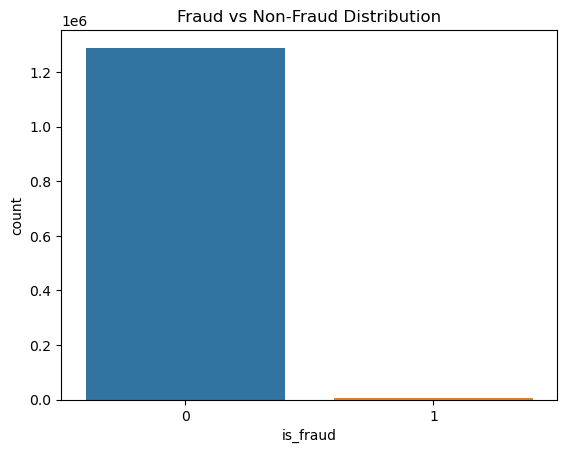

In [22]:
sns.countplot(x='is_fraud', data=df)
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()

In the above graph, we can see, that even an amount of 10000 isn't considered as fraud. So, it can be concluded that the dataset is having imbalance

### Transaction amount vs fraud

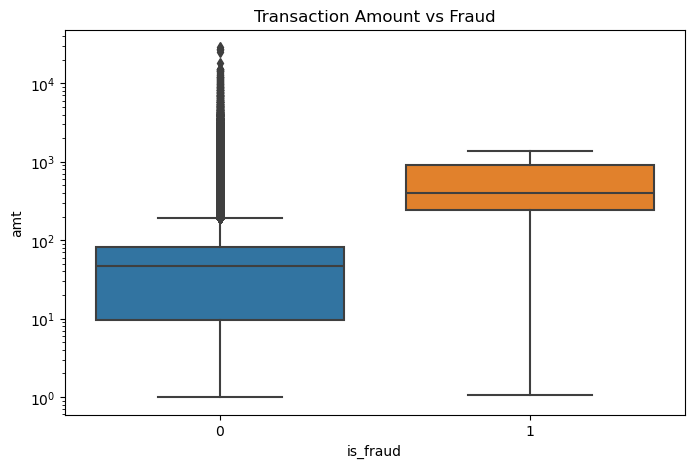

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(x='is_fraud', y='amt', data=df)
plt.yscale('log')
plt.title("Transaction Amount vs Fraud")
plt.show()

### Time-based fraud patterns

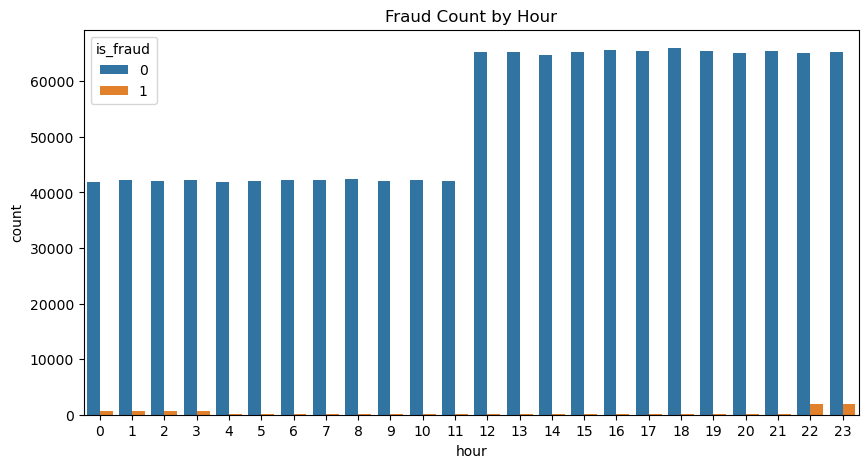

In [24]:
df_plot = df.copy()
df_plot['is_fraud'] = df_plot['is_fraud'].astype(str)

plt.figure(figsize=(10,5))
sns.countplot(x='hour', hue='is_fraud', data=df_plot)
plt.title("Fraud Count by Hour")
plt.show()

### Category vs fraud

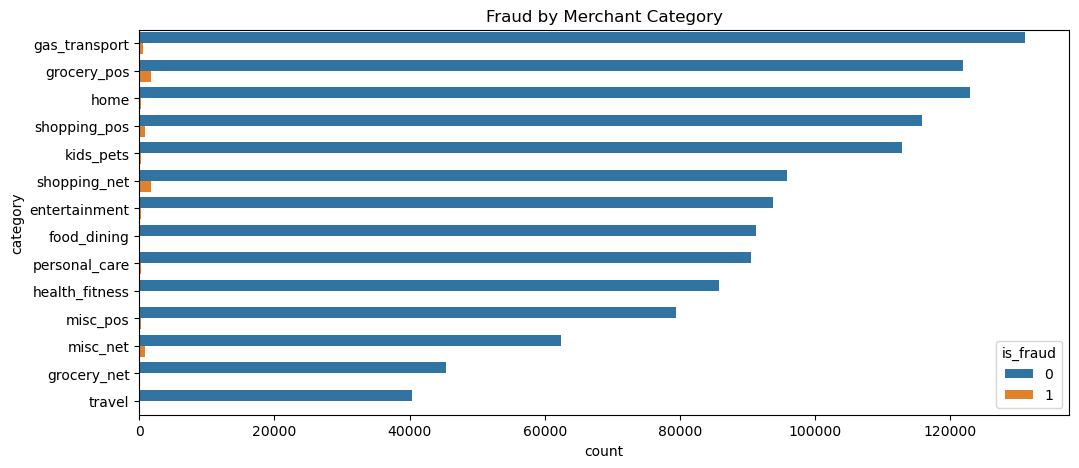

In [25]:
plt.figure(figsize=(12,5))
sns.countplot(
    y='category',
    hue='is_fraud',
    data=df_plot,
    order=df_plot['category'].value_counts().index
)
plt.title("Fraud by Merchant Category")
plt.show()

### Correlation heatmap

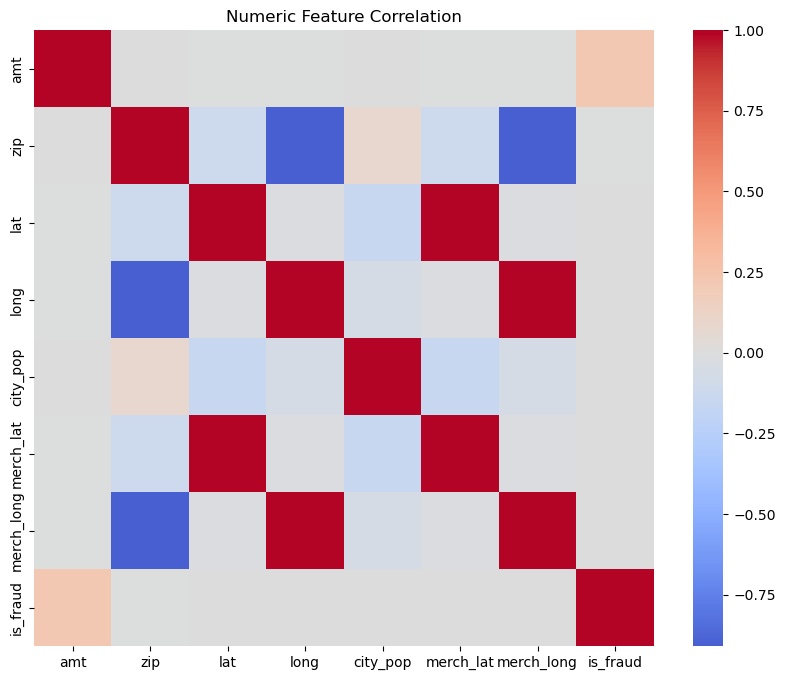

In [26]:
plt.figure(figsize=(10,8))
corr = df.select_dtypes(include=['int64','float64']).corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Numeric Feature Correlation")
plt.show()

### Amount vs hour

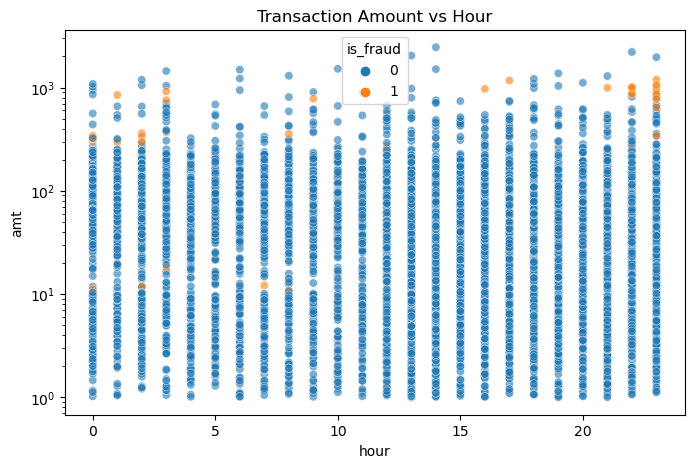

In [28]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='hour',
    y='amt',
    hue='is_fraud',
    data=df.sample(10000),
    alpha=0.6
)
plt.yscale('log')
plt.title("Transaction Amount vs Hour")
plt.show()

## Switching the algorithm to XGBoost

In [30]:
from xgboost import XGBClassifier
xgb_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', XGBClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=(len(y_train) - y_train.sum()) / y_train.sum(),
        eval_metric='logloss',
        use_label_encoder=False,
        n_jobs=-1,
        random_state=42
    ))
])


In [31]:
xgb_model.fit(X_train, y_train)

C:\Users\DHYEY DESAI\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:51:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,steps,"[('preprocess', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [32]:
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

In [33]:
print(classification_report(y_test, y_pred_xgb, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_xgb))

              precision    recall  f1-score   support

           0     0.9997    0.9699    0.9846    257834
           1     0.1560    0.9560    0.2683      1501

    accuracy                         0.9698    259335
   macro avg     0.5779    0.9630    0.6264    259335
weighted avg     0.9949    0.9698    0.9804    259335

ROC-AUC: 0.9950296147503445
